### 1. 데이터 정의

- CLIENTNUM	: Client number. Unique identifier for the customer holding the account
- Attrition_Flag : Internal event (customer activity) variable - if the account is closed then 1 else 0
- Customer_Age / Gender	
- Dependent_count : Number of dependents
- Education_Level
- Marital_Status : Married, Single, Divorced, Unknown
- Income_Category : Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, >
- Card_Category : Type of Card (Blue, Silver, Gold, Platinum)
- Months_on_book : Period of relationship with bank

In [30]:
import pandas as pd 
import numpy as np 

In [57]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
plt.style.use('ggplot') # default plot style.

from scipy import stats
from scipy.stats import norm

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

import math
import warnings
warnings.filterwarnings('ignore')

In [31]:
df = pd.read_csv('BankChurners.csv')

In [32]:
df = df.drop(df.columns[[-2, -1]], axis='columns')

In [33]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [34]:
df.head(3)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  

[3 rows x 21 columns]

### 2. 데이터 탐색

In [35]:
def object_describe(df, ID) :
    
    # df : 테이블명 
    # ID : Unique count 기준이 되는 ID 
    
    key_list = list()
    value_list = list() 
    cust_max_list = list()
    cust_max_list2 = list()
    cust_max_value = list()
    cust_max_value2 = list() 
    for key, value in dict(df.dtypes == object).items() : 
        if value : 
            key_list.append(key) 
            value_list.append(df[key].nunique())
            cust_max_list.append(df.groupby(key)[ID].nunique().sort_values(ascending =False).keys()[0])
            cust_max_value.append(df[key].value_counts(normalize=True).sort_values(ascending =False)[0])
            cust_max_list2.append(df.groupby(key)[ID].nunique().sort_values(ascending =False).keys()[1])
            cust_max_value2.append(df[key].value_counts(normalize=True).sort_values(ascending =False)[1])
    result = pd.DataFrame({'column' : key_list
                         ,'label_count' : value_list 
                         ,'Top1_label':cust_max_list   
                         ,'Top1_percent':cust_max_value   
                         ,'Top2_label':cust_max_list2  
                         ,'Top2_percent':cust_max_value2  
                         })
    return result

#### 1) Numeric

In [36]:
df.describe()

CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
count     10127.000000          10127.000000     10127.000000    10127.000000   
mean       7469.139637              0.759941      4404.086304       64.858695   
std        9090.685324              0.219207      3397.129254       23.472570   
min           3.000000              0.000000       510.000000       10.000000   
25%        1324.500000              0.631000      2155.500000       45.000000   
50%        3474.000000              0.736000      3899.000000       67.000000   
75%        9859.000000              0.859000      4741.000000       81.000000   
max       34516.000000              3.397000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
count         10127.000000           10127.000000  
mean              0.712222               0.274894  
std               0.238086               0.275691  
min               0.000000               0.000000  
25%               0.582000               0.023000  
50%               0.702000               0.176000  
75%               0.818000               0.503000  
max               3.714000               0.999000

#### 2) String

In [37]:
object_describe(df, 'CLIENTNUM')

column  label_count         Top1_label  Top1_percent  \
0   Attrition_Flag            2  Existing Customer      0.839340   
1           Gender            2                  F      0.529081   
2  Education_Level            7           Graduate      0.308877   
3   Marital_Status            4            Married      0.462822   
4  Income_Category            6     Less than $40K      0.351634   
5    Card_Category            4               Blue      0.931767   

          Top2_label  Top2_percent  
0  Attrited Customer      0.160660  
1                  M      0.470919  
2        High School      0.198776  
3             Single      0.389355  
4        $40K - $60K      0.176755  
5             Silver      0.054804

In [38]:
df.to_csv('BankChurners_chng.csv',index=False)

In [39]:
## eda 하기 

In [40]:
# !pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class

Shape of your Data Set: (10127, 21)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  5
    Number of Integer-Categorical Columns =  9
    Number of String-Categorical Columns =  4
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    20 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables

################ Binary_Classification VISUALIZATION Started #####################


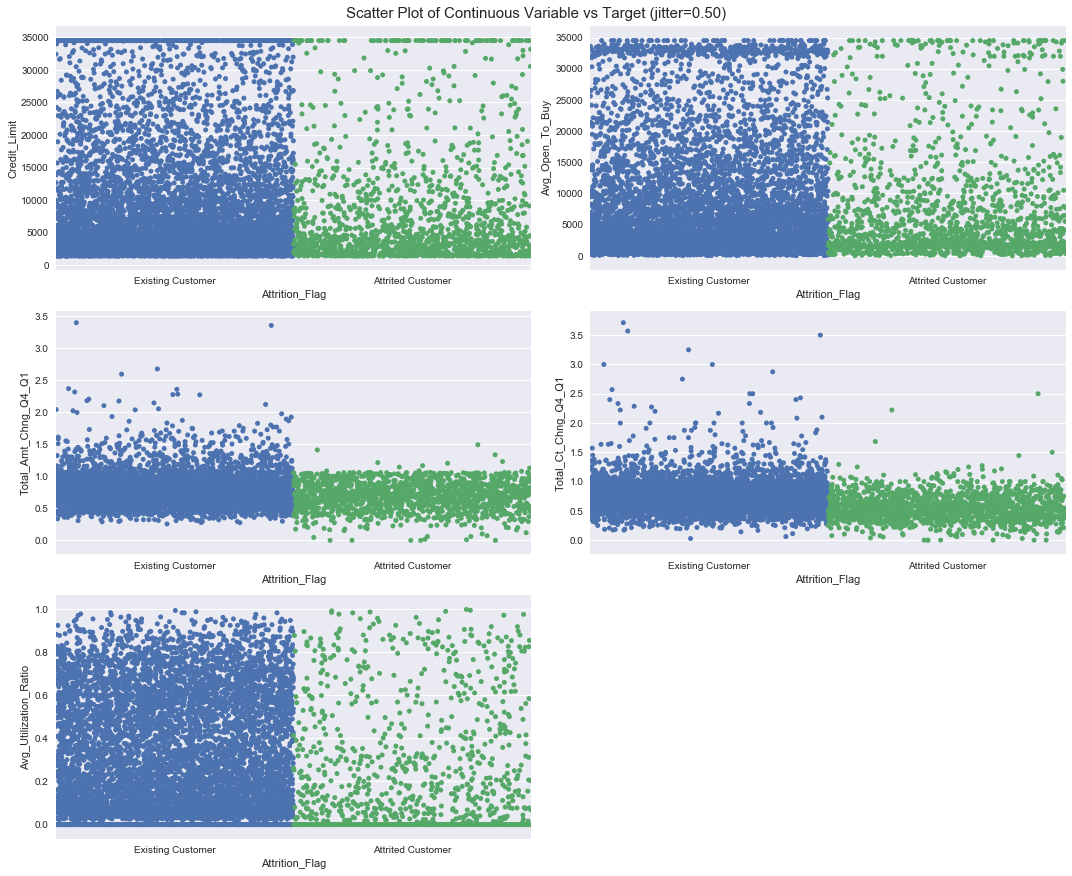

Total Number of Scatter Plots = 15


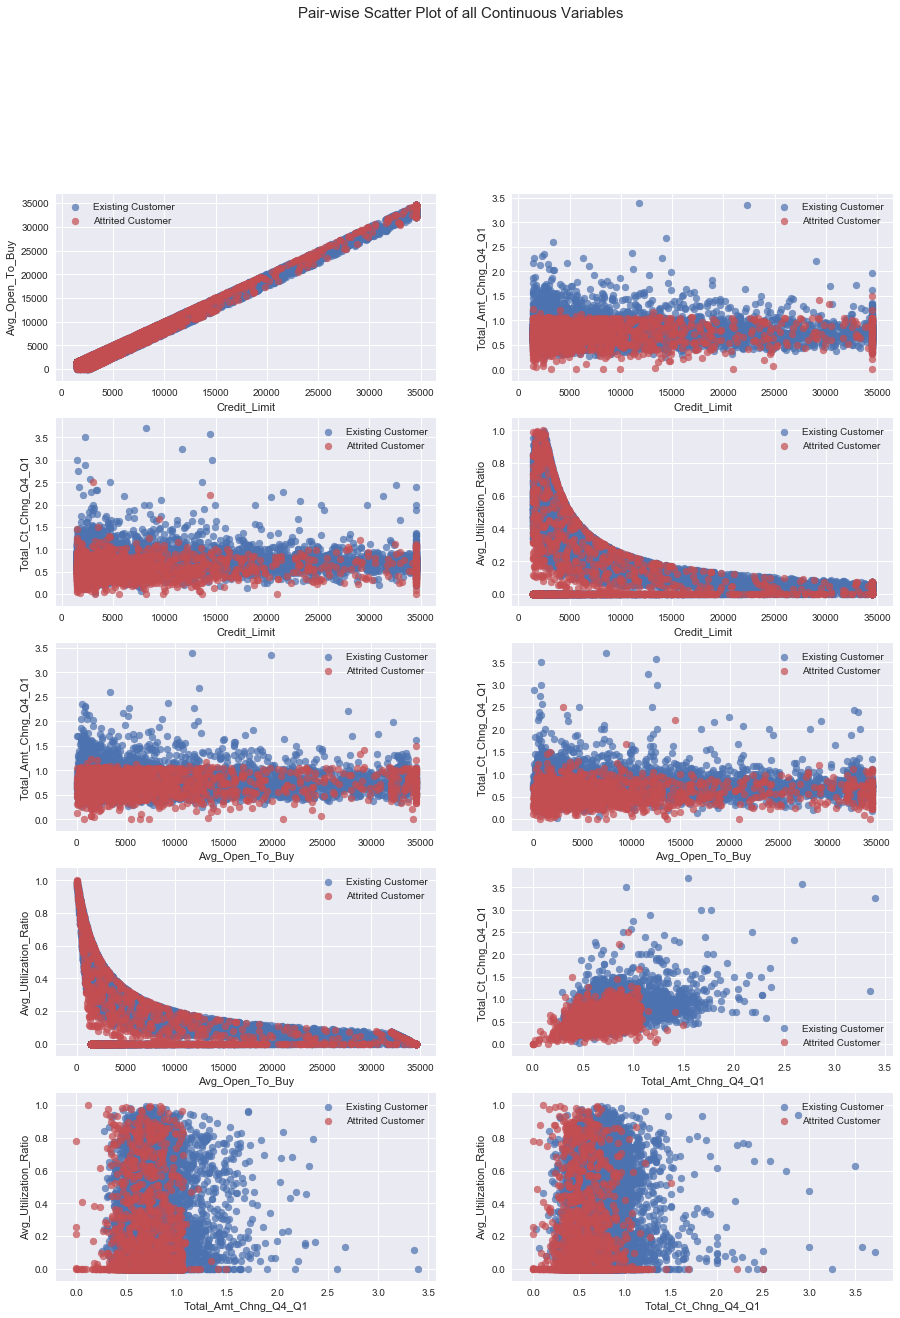

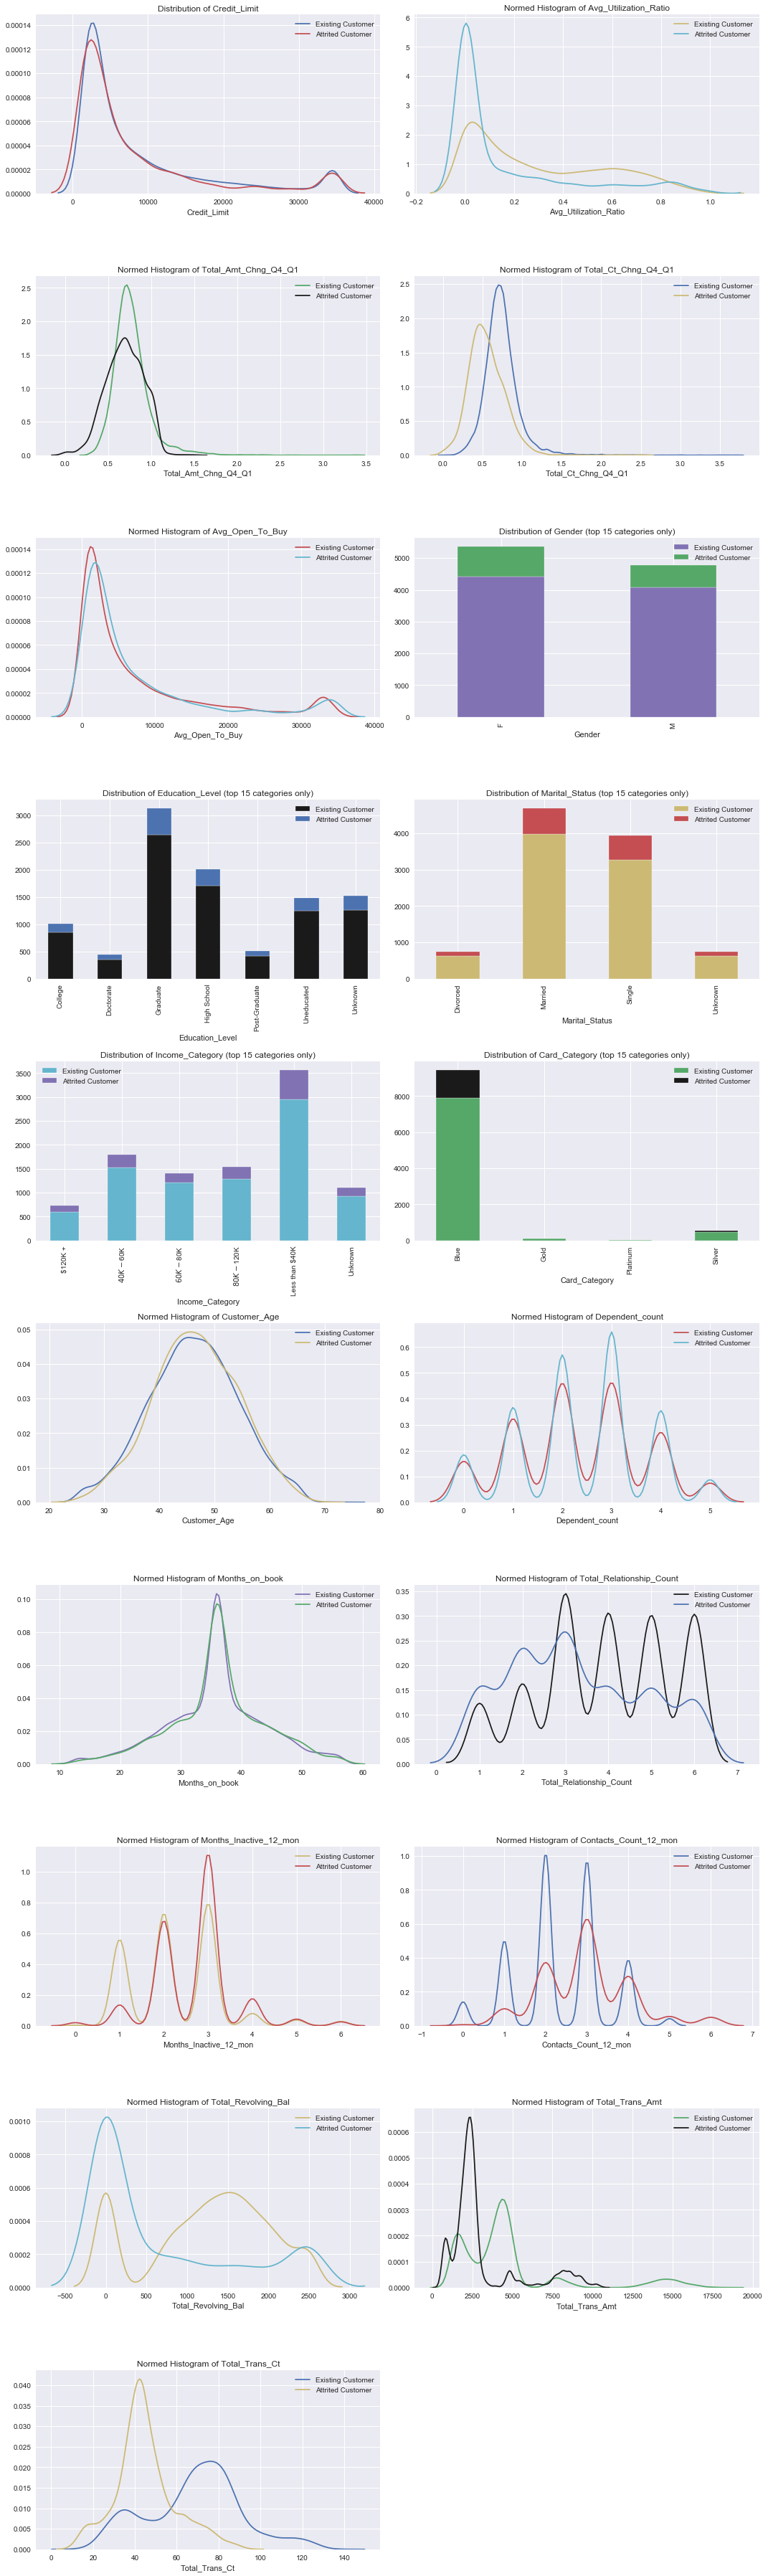

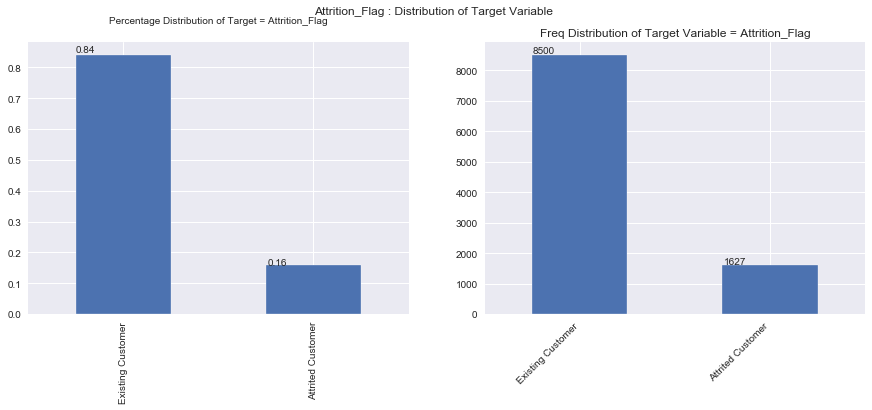

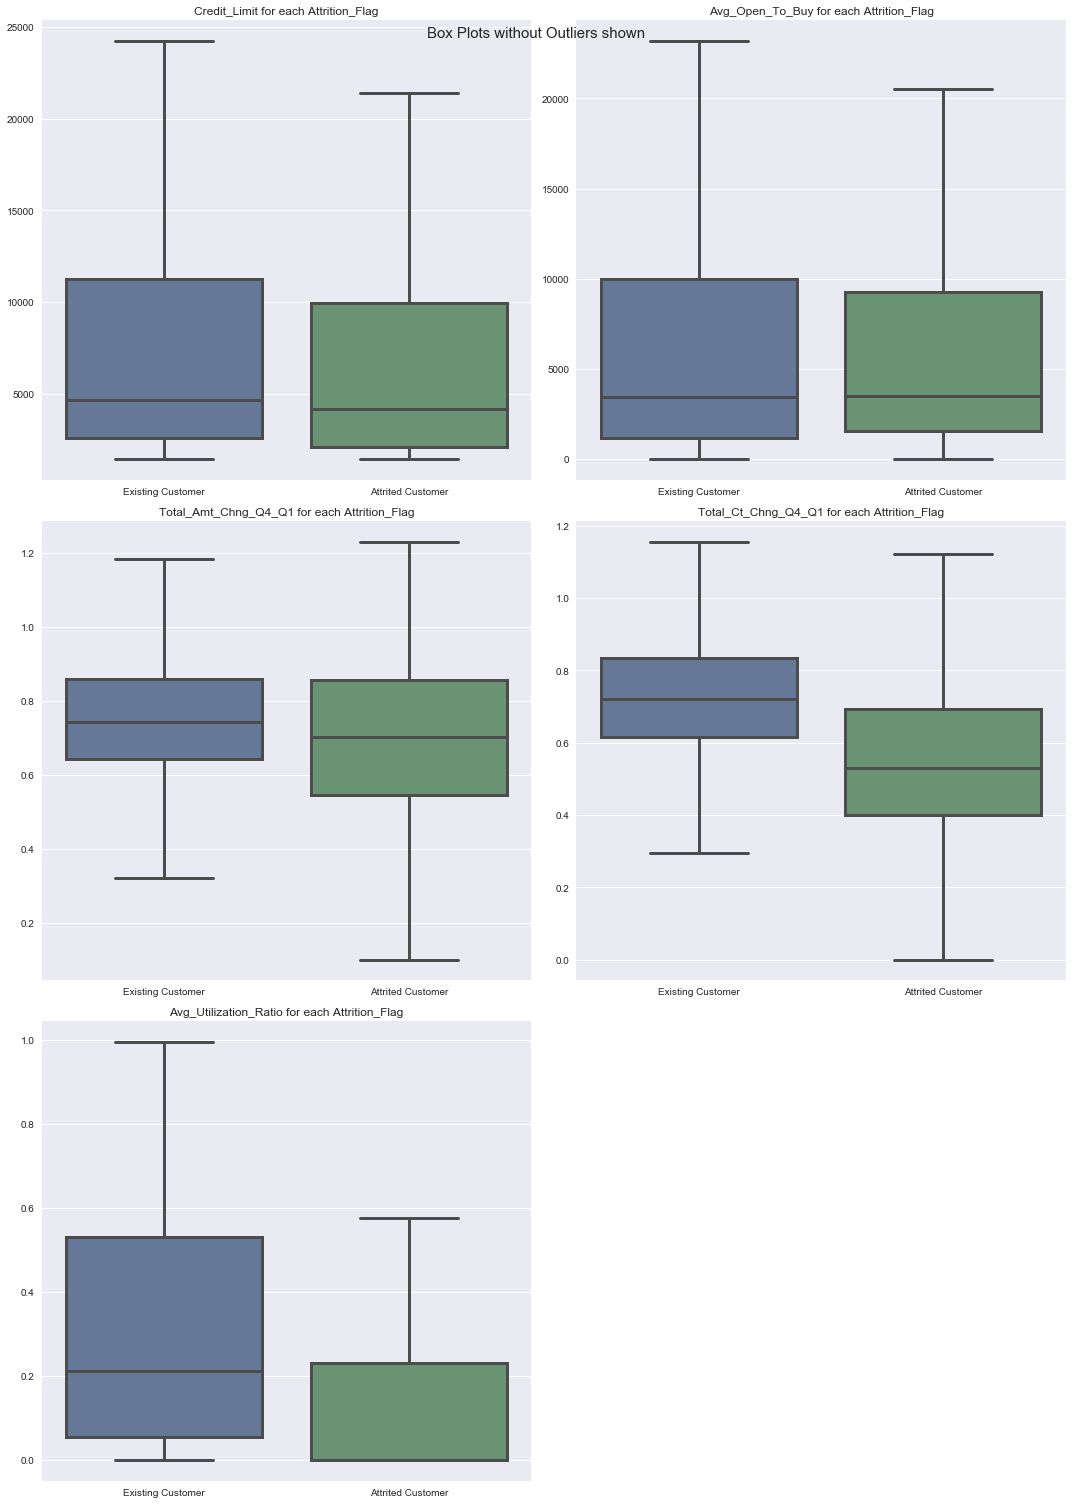

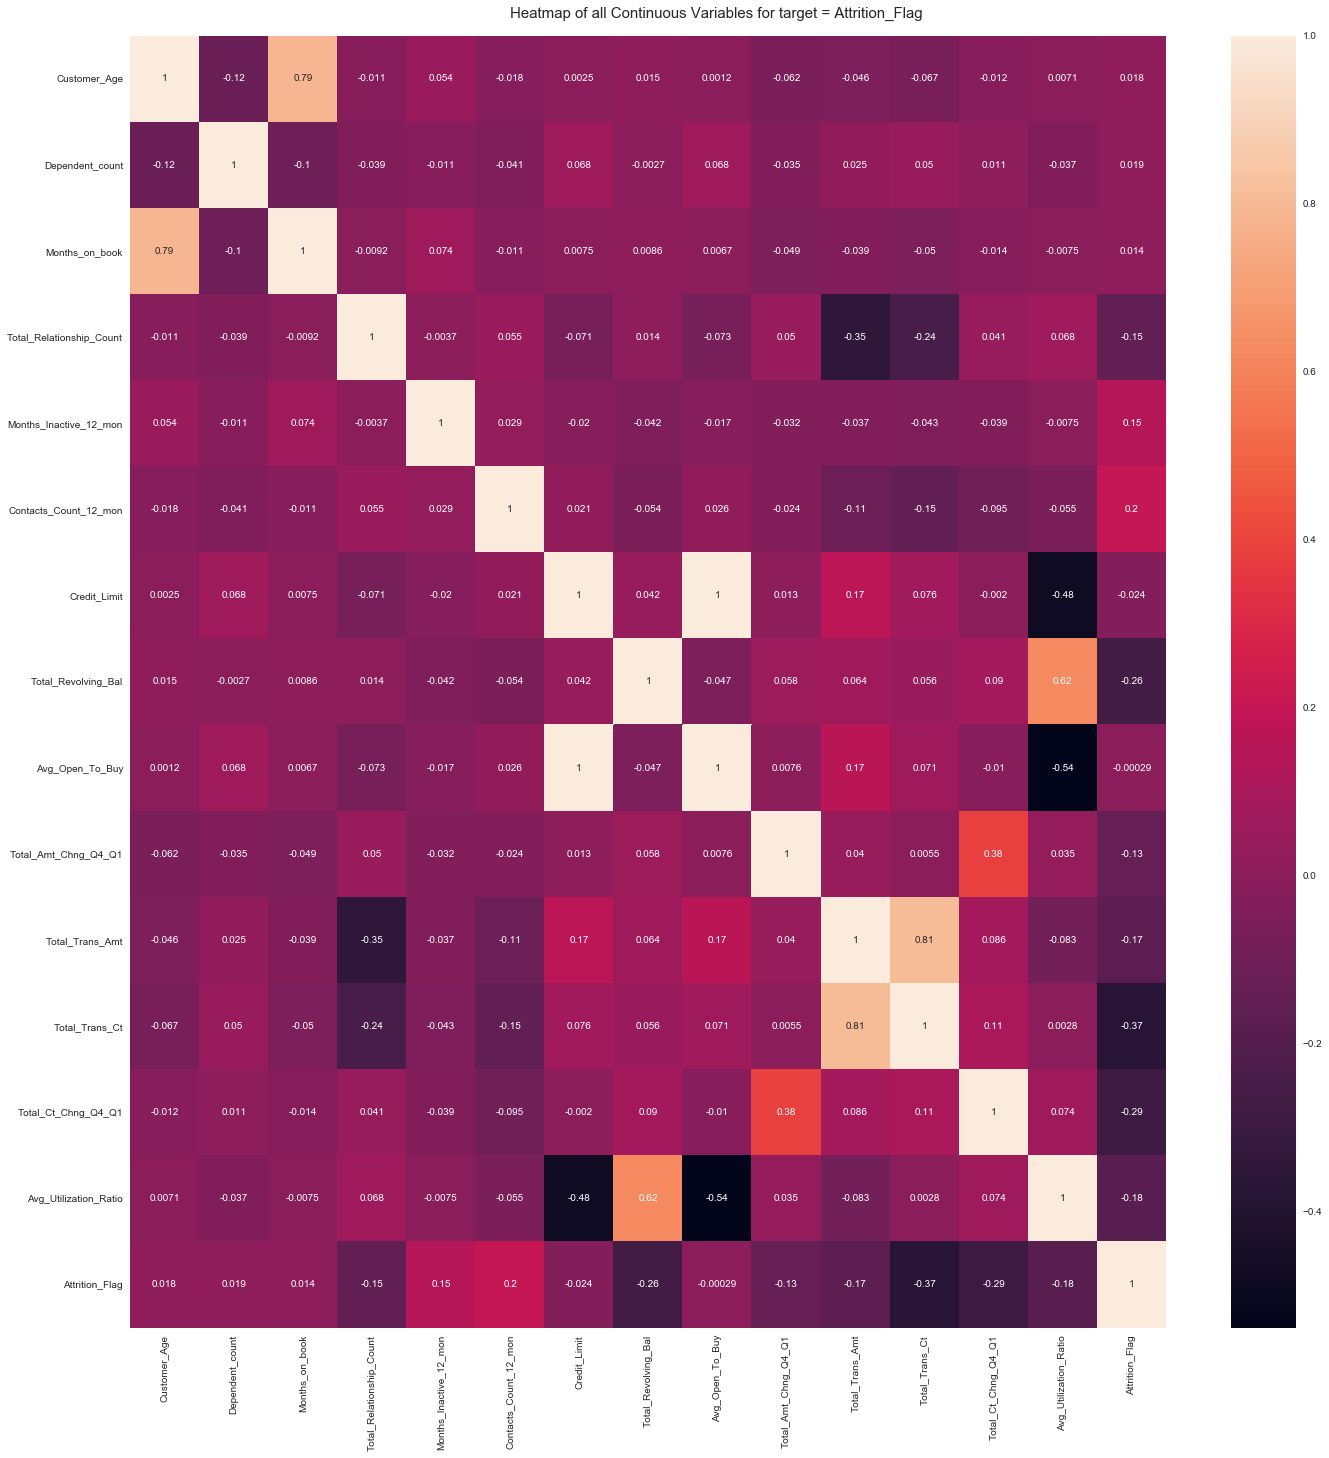

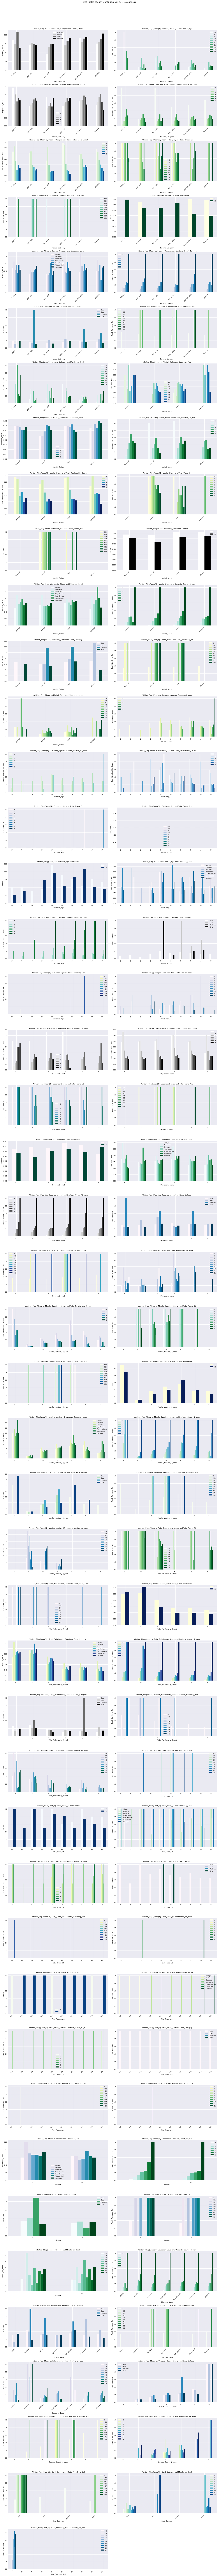

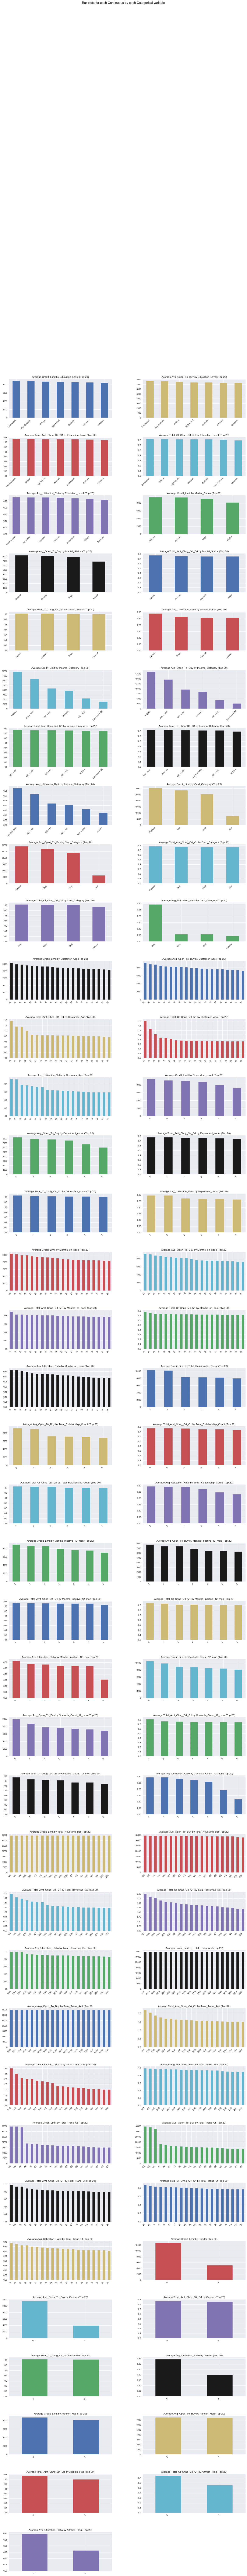

Time to run AutoViz (in seconds) = 80.133

 ###################### VISUALIZATION Completed ########################


In [12]:
AV = AutoViz_Class()
df_viz = AV.AutoViz('BankChurners_chng.csv', depVar='Attrition_Flag')

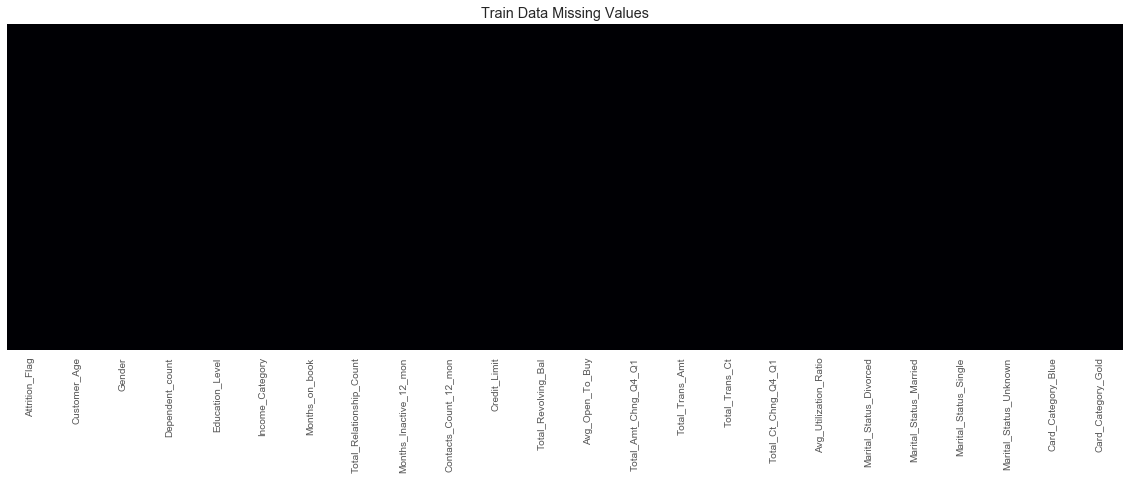

In [58]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.set_title('Train Data Missing Values')
plt.xticks(rotation=90)
sns.heatmap(df.iloc[:,:-2].isnull(), yticklabels=False, cbar=False, cmap='magma', ax=ax)
plt.show()

In [41]:
# full_df['Attrition_Flag'] = full_df.Attrition_Flag // same thing
df['Attrition_Flag'] = df.Attrition_Flag.map({'Existing Customer':1, 'Attrited Customer':0})
df['Gender'] = df.Gender.map({'M':1, 'F':0})

In [42]:
income_data = df['Income_Category'].replace({'Unknown': 0 , 'Less than $40K':1, '$40K - $60K':2, 
                                                  '$80K - $120K':3, '$60K - $80K':4, '$120K +':5})

education_data = df['Education_Level'].replace({'Unknown': 0, 'High School':1, 'Graduate':2, 'Uneducated':3,
                                                     'College':4,'Post-Graduate':5,'Doctorate':6})

df['Income_Category'] = income_data
df['Education_Level'] = education_data

In [43]:
df.head(3)

CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   

   Education_Level Marital_Status  Income_Category Card_Category  \
0                1        Married                4          Blue   
1                2         Single                1          Blue   
2                2        Married                3          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  

[3 rows x 21 columns]

In [44]:
df.drop('CLIENTNUM', axis=1, inplace=True)

In [46]:
def encoding_object(df, drop_column = False, drop_first = False) : 
    # df : 테이블이름
    # drop_first : n-1개의 특성 만들어줄지 말지
    if drop_column : 
        df.drop(drop_column, axis=1, inplace=True)
    columnsToEncode = df.select_dtypes(include=[object]).columns
    df = pd.get_dummies(df, columns=columnsToEncode, drop_first=drop_first)
    return df 

In [47]:
df = encoding_object(df)

In [48]:
df.shape

(10127, 26)

In [49]:
df.head(3)

Attrition_Flag  Customer_Age  Gender  Dependent_count  Education_Level  \
0               1            45       1                3                1   
1               1            49       0                5                2   
2               1            51       1                3                2   

   Income_Category  Months_on_book  Total_Relationship_Count  \
0                4              39                         5   
1                1              44                         6   
2                3              36                         4   

   Months_Inactive_12_mon  Contacts_Count_12_mon  ...  Total_Ct_Chng_Q4_Q1  \
0                       1                      3  ...                1.625   
1                       1                      2  ...                3.714   
2                       1                      0  ...                2.333   

   Avg_Utilization_Ratio  Marital_Status_Divorced  Marital_Status_Married  \
0                  0.061                        0                       1   
1                  0.105                        0                       0   
2                  0.000                        0                       1   

   Marital_Status_Single  Marital_Status_Unknown  Card_Category_Blue  \
0                      0                       0                   1   
1                      1                       0                   1   
2                      0                       0                   1   

   Card_Category_Gold  Card_Category_Platinum  Card_Category_Silver  
0                   0                       0                     0  
1                   0                       0                     0  
2                   0                       0                     0  

[3 rows x 26 columns]

In [50]:
df.describe()

Attrition_Flag  Customer_Age        Gender  Dependent_count  \
count    10127.000000  10127.000000  10127.000000     10127.000000   
mean         0.839340     46.325960      0.470919         2.346203   
std          0.367235      8.016814      0.499178         1.298908   
min          0.000000     26.000000      0.000000         0.000000   
25%          1.000000     41.000000      0.000000         1.000000   
50%          1.000000     46.000000      0.000000         2.000000   
75%          1.000000     52.000000      1.000000         3.000000   
max          1.000000     73.000000      1.000000         5.000000   

       Education_Level  Income_Category  Months_on_book  \
count     10127.000000     10127.000000    10127.000000   
mean          2.179125         2.072578       35.928409   
std           1.576387         1.461929        7.986416   
min           0.000000         0.000000       13.000000   
25%           1.000000         1.000000       31.000000   
50%           2.000000         2.000000       36.000000   
75%           3.000000         3.000000       40.000000   
max           6.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  ...  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
count           10127.000000  ...         10127.000000           10127.000000   
mean                2.455317  ...             0.712222               0.274894   
std                 1.106225  ...             0.238086               0.275691   
min                 0.000000  ...             0.000000               0.000000   
25%                 2.000000  ...             0.582000               0.023000   
50%                 2.000000  ...             0.702000               0.176000   
75%                 3.000000  ...             0.818000               0.503000   
max                 6.000000  ...             3.714000               0.999000   

       Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
count             10127.000000            10127.000000           10127.000000   
mean                  0.073862                0.462822               0.389355   
std                   0.261559                0.498641               0.487628   
min                   0.000000                0.000000               0.000000   
25%                   0.000000                0.000000               0.000000   
50%                   0.000000                0.000000               0.000000   
75%                   0.000000                1.000000               1.000000   
max                   1.000000                1.000000               1.000000   

       Marital_Status_Unknown  Card_Category_Blue  Card_Category_Gold  \
count            10127.000000        10127.000000        10127.000000   
mean                 0.073961            0.931767            0.011455   
std                  0.261720            0.252159            0.106416   
min                  0.000000            0.000000            0.000000   
25%                  0.000000            1.000000            0.000000   
50%                  0.000000            1.000000            0.000000   
75%                  0.000000            1.000000            0.000000   
max                  1.000000            1.000000            1.000000   

       Card_Category_Platinum  Card_Category_Silver  
count            10127.000000          10127.000000  
mean                 0.001975              0.054804  
std                  0.044398   

In [26]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [52]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

In [53]:
m_logreg = LogisticRegression()
m_gbc = GradientBoostingClassifier(random_state=14)
m_rfc = RandomForestClassifier(criterion='gini', n_estimators=999,
                            max_depth=4, random_state=14)
m_lgb = lgb.LGBMClassifier(num_iterations=550, learning_rate=0.01055,
                        max_depth=3, random_state=14)
m_xgb = xgb.XGBClassifier(n_estimators=2250,
                       max_depth=2, random_state=14)
m_gnb = GaussianNB()
m_mlpc = MLPClassifier(random_state=14)
m_svc = SVC(probability=True)

In [55]:
cv = StratifiedKFold(11, shuffle=True, random_state=14)
models = [m_logreg, m_gbc, m_rfc, m_lgb, m_xgb, m_gnb, m_mlpc, m_svc]

print(X.shape)
print(y.shape)

(10127, 25)
(10127,)


In [59]:
train_acc_dict, test_acc_dict, time_dict = estimates(X, y, models, cv)

NameError: name 'estimates' is not defined

$$
x^2
$$ 